# 1. Introduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(10)

## Download the prml.zip from Brightspace and extract its contents into the same folder as the assignment 1 file

## 1. Polynomial Curve Fitting

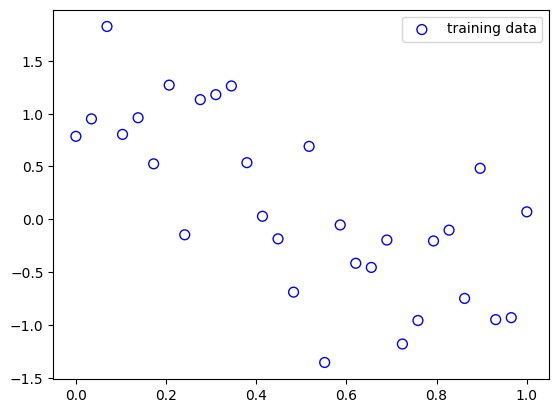

In [3]:
# Consider the given training data points

x_train = np.array([0.0,0.03448276,0.06896552,0.10344828,0.13793103,0.17241379
,0.20689655,0.24137931,0.27586207,0.31034483,0.34482759,0.37931034
,0.4137931,0.44827586,0.48275862,0.51724138,0.55172414,0.5862069
,0.62068966,0.65517241,0.68965517,0.72413793,0.75862069,0.79310345
,0.82758621,0.86206897,0.89655172,0.93103448,0.96551724,1.0])

y_train = np.array([0.78555925,0.95085481,1.82565985,0.80389519,0.96158465,0.52533655
,1.2704089,-0.14653644,1.13308122,1.1800903,1.26261986,0.53629701
,0.02880429,-0.18501542,-0.6894971,0.69057719,-1.35543259,-0.05317237
,-0.41614939,-0.4555357,-0.19606332,-1.18057323,-0.95786116,-0.20486968
,-0.10261094,-0.7491855,0.48288818,-0.94964785,-0.93100609,0.07077979])

x_test = np.array([0.0,0.02040816,0.04081633,0.06122449,0.08163265,0.10204082
,0.12244898,0.14285714,0.16326531,0.18367347,0.20408163,0.2244898
,0.24489796,0.26530612,0.28571429,0.30612245,0.32653061,0.34693878
,0.36734694,0.3877551,0.40816327,0.42857143,0.44897959,0.46938776
,0.48979592,0.51020408,0.53061224,0.55102041,0.57142857,0.59183673
,0.6122449,0.63265306,0.65306122,0.67346939,0.69387755,0.71428571
,0.73469388,0.75510204,0.7755102,0.79591837,0.81632653,0.83673469
,0.85714286,0.87755102,0.89795918,0.91836735,0.93877551,0.95918367
,0.97959184,1.0])

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.legend()
plt.show()

## 1a) Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

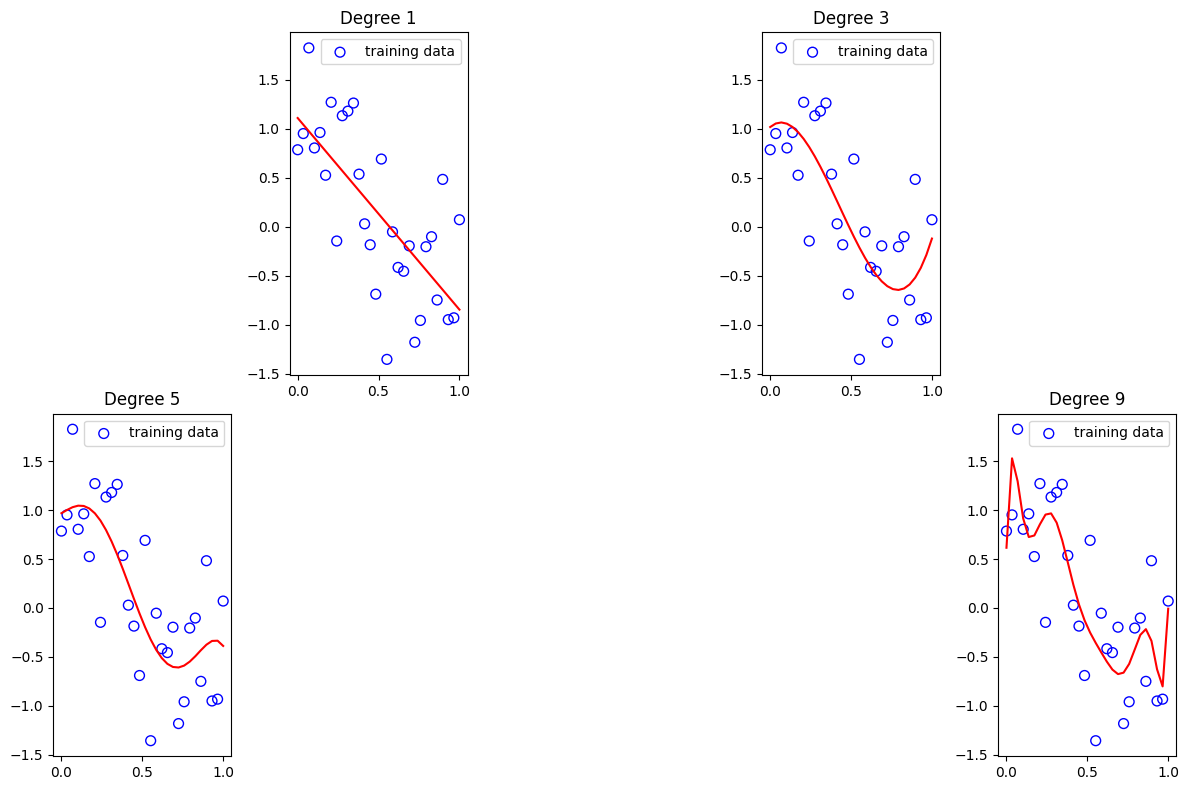

In [4]:
#your code is here, for 4 chosen values of M, I got the following fitted curves
m_values = [1,3,5,9]

plt.figure(figsize=(12, 8))

for m in m_values:
    # Create polynomial features
    poly_features = PolynomialFeature(degree=m)
    X_poly = poly_features.transform(x_train.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train)

    y_pred = model.predict(X_poly)

    plt.subplot(2, 5, m + 1)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_train, y_pred, color='r')
    plt.title(f'Degree {m}')
    plt.legend()

plt.tight_layout()
plt.show()



## 1b) Which degree of polynomial fits the best and why?

#your answer below, write the equation of the best fit polynomial
m = 3
y = w0 + w1x + w2x^2 + w3x^3

Best choice for m is 3 as it fits training sets perfectly and minimises the error. m = 9 won't be a best choice 
as it is computationally expensive and it will result in overfitting as most of the training points are on the error function.

In [5]:
## 2. Polynomial Features

#### Consider x_train, y_train, and x_test from section 1 to predict y. 
#### Use below y_test data to calculate RMSE 

In [6]:
# Test Data

y_test = np.array([8.00000000e-01,7.96303292e-01,7.85247323e-01,7.66934282e-01
,7.41533410e-01,7.09279439e-01,6.70470483e-01,6.25465193e-01
,5.74679470e-01,5.18582714e-01,4.57693336e-01,3.92574028e-01
,3.23826672e-01,2.52086583e-01,1.78016731e-01,1.02301726e-01
,2.56412705e-02,-5.12561929e-02,-1.27679921e-01,-2.02923660e-01
,-2.76292060e-01,-3.47106996e-01,-4.14714049e-01,-4.78488439e-01
,-5.37840717e-01,-5.92222394e-01,-6.41130886e-01,-6.84114214e-01
,-7.20775092e-01,-7.50774732e-01,-7.73835892e-01,-7.89745426e-01
,-7.98356313e-01,-7.99588973e-01,-7.93432012e-01,-7.79942333e-01
,-7.59244595e-01,-7.31530100e-01,-6.97054971e-01,-6.56137798e-01
,-6.09156768e-01,-5.56546051e-01,-4.98791833e-01,-4.36427922e-01
,-3.70030644e-01,-3.00213593e-01,-2.27622070e-01,-1.52926916e-01
,-7.68184085e-02,-1.46957616e-16])

### 2a) Plot a graph showing the training RMSE and test RMSE for various values of M (Degree)

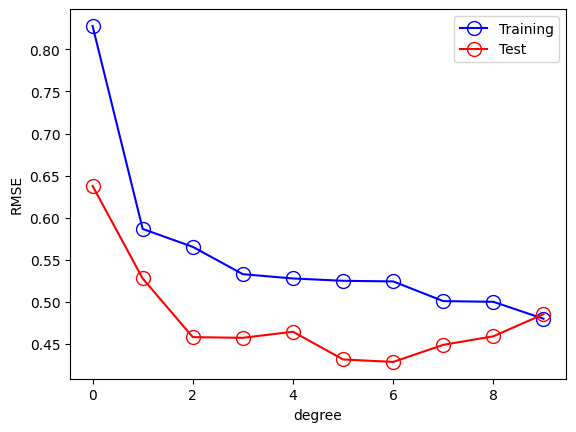

In [7]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

from sklearn.metrics import mean_squared_error 
#your code goes here
degrees = list(range(10))

training_errors = []
test_errors = []

for m in degrees:
    feature = PolynomialFeature(degree=m)
    X_train = feature.transform(x_train.reshape(-1, 1))
    X_test = feature.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()



### 2b) Explain your observations and which value of M do you think is the best choice for the given data?

#your answer is here
For M < 3 It is poor due to inflexible polynomials. In the case of M = 3 and M = 7. RMSE is almost equal.So, we choose M = 3 as there's no point of evaluating four more parameter. M = 9 means 10 degress of freedom.Tuned exactly to 10 training points - wild oscillations in polynomial.

### 3. Regularization

#Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression

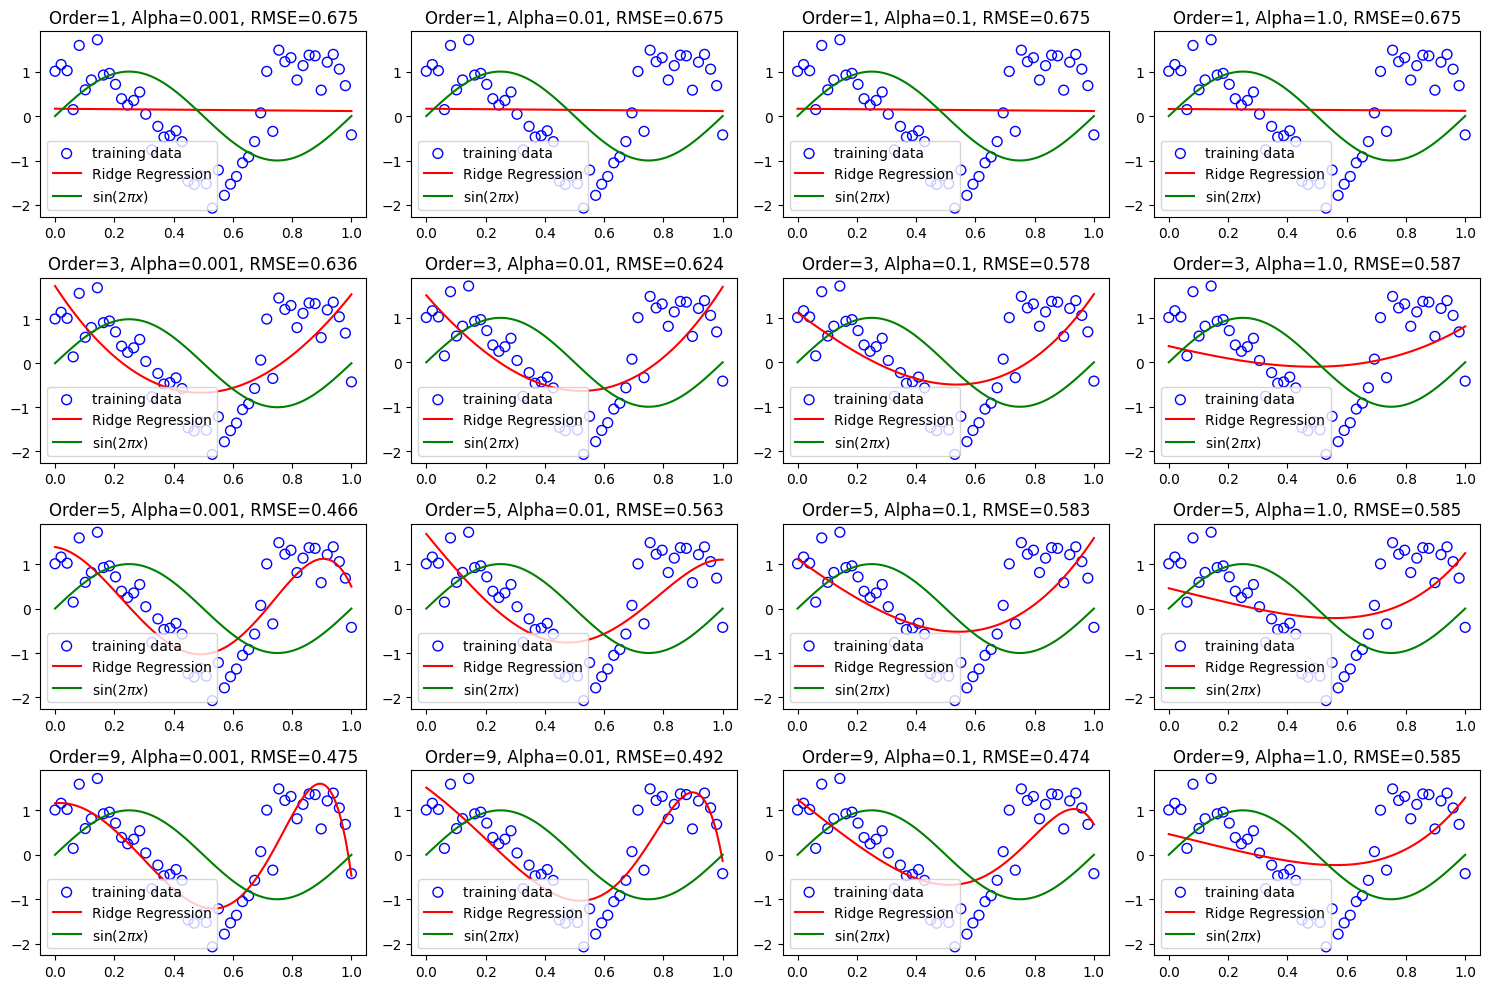

In [28]:
#your code goes here, one example curve from my implementation was like below.
from sklearn.linear_model import Ridge
poly_orders = [1,3,5,9]
alpha_values = [0.001, 0.01, 0.1, 1.0] 

fig, axs = plt.subplots(len(poly_orders), len(alpha_values), figsize=(15, 10))

def func(x):
    return np.sin(2 * np.pi * x)

for i, order in enumerate(poly_orders):
    for j, alpha in enumerate(alpha_values):
        poly = PolynomialFeature(degree=order)
        x_train_poly = poly.transform(x_train.reshape(-1, 1))
        x_test_poly = poly.transform(x_test.reshape(-1, 1))

        ridge = Ridge(alpha=alpha)
        ridge.fit(x_train_poly, y_train)

        y_test_pred = ridge.predict(x_test_poly)

        rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        axs[i, j].scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
        axs[i, j].plot(x_test, y_test_pred, c="r", label="Ridge Regression")
        axs[i, j].plot(x_test, func(x_test), c="g", label="$\sin(2\pi x) $")
        axs[i, j].set_title(f"Order={order}, Alpha={alpha}, RMSE={rmse:.3f}")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

## The dataset generating functions are below

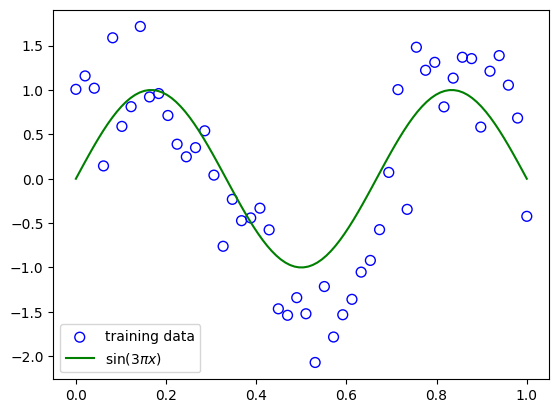

In [9]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced numbers over a specified interval [0, 1].
    t = func(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t

def func(x):
    return np.sin(3 * np.pi * x)
#an example dataset using std=0.7 is as follows
x_train, y_train = create_toy_data(func, 50, 0.7)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(3\pi x) $")
plt.legend()
plt.show()

## Create atleast 2 datasets using different types of values (e.g., small or large) for std in the create_toy_data() and choosing a different func(), which was considered as a sinosoid for my example


# Repeat section 1a,1b,2a,2b, and 3 for the datasets generated above

1.) Polynomial Function = 4 * x**3 - 3 * x**2 + 2 * x - 1

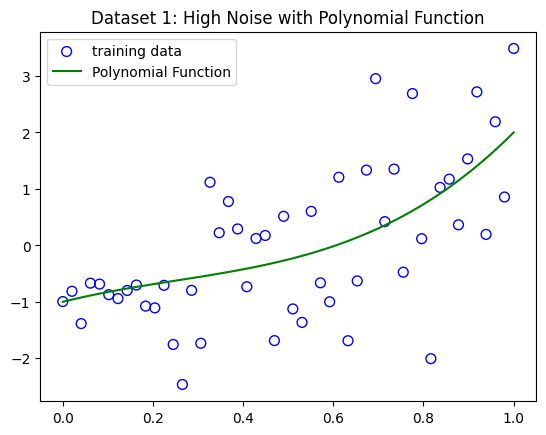

In [10]:
# Define a polynomial function
def polynomial_function(x):
    return 4 * x**3 - 3 * x**2 + 2 * x - 1

# Create a dataset with high noise (std=1.0) and the polynomial function
x_train1, y_train1 = create_toy_data(polynomial_function, 50, 1.0)
x_test1 = np.linspace(0, 1, 100)
y_test1 = polynomial_function(x_test1)

# Plot the dataset
plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test1, y_test1, c="g", label="Polynomial Function")
plt.legend()
plt.title("Dataset 1: High Noise with Polynomial Function")
plt.show()


## 1a) Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

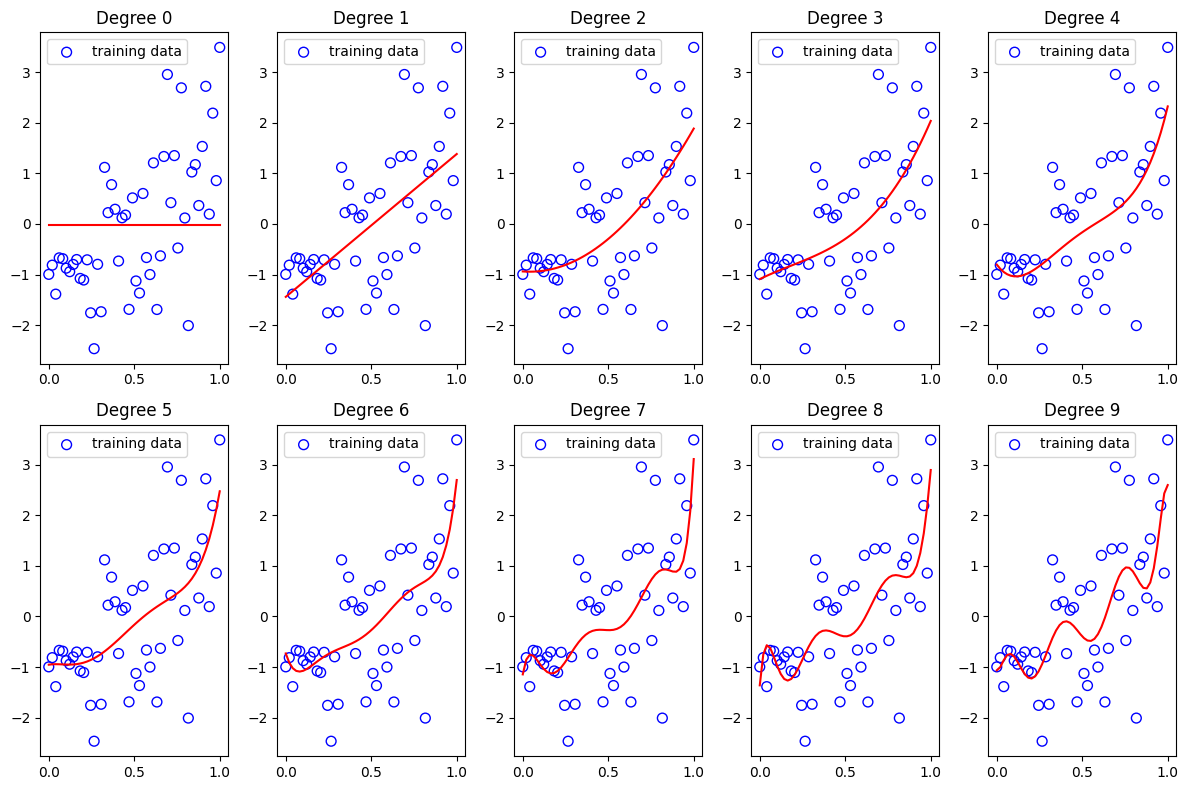

In [17]:
m_values = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12, 8))

for m in m_values:
    # Create polynomial features
    poly_features = PolynomialFeature(degree=m)
    X_poly = poly_features.transform(x_train1.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train1)

    y_pred = model.predict(X_poly)

    plt.subplot(2, 5, m + 1)
    plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_train1, y_pred, color='r')
    plt.title(f'Degree {m}')
    plt.legend()

plt.tight_layout()
plt.show()

## 1b) Which degree of polynomial fits the best and why?

m = 4
y = w0 + w1x + w2x^2 + w3x^3 + w4x^4

Best choice for m is 4 as it fits training sets perfectly and minimises the error. m = 9 won't be a best choice 
as it is computationally expensive and it will result in overfitting as most of the training points are on the error function.

2.) Cos function = cos(2*pi*x) 

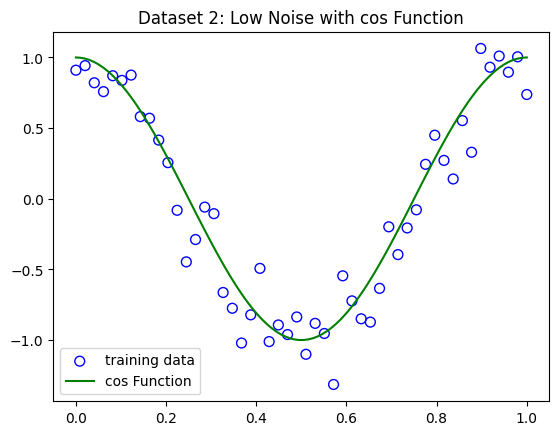

In [25]:
# Define a cos function with a different frequency
def cos_function(x):
    return np.cos(2 * np.pi * x)

# Create a dataset with low noise (std=0.2) and the cos function
x_train2, y_train2 = create_toy_data(cos_function, 50, 0.2)
x_test2 = np.linspace(0, 1, 100)
y_test2 = cos_function(x_test2)

plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test2, y_test2, c="g", label="cos Function")
plt.legend()
plt.title("Dataset 2: Low Noise with cos Function")
plt.show()

## 1a) Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

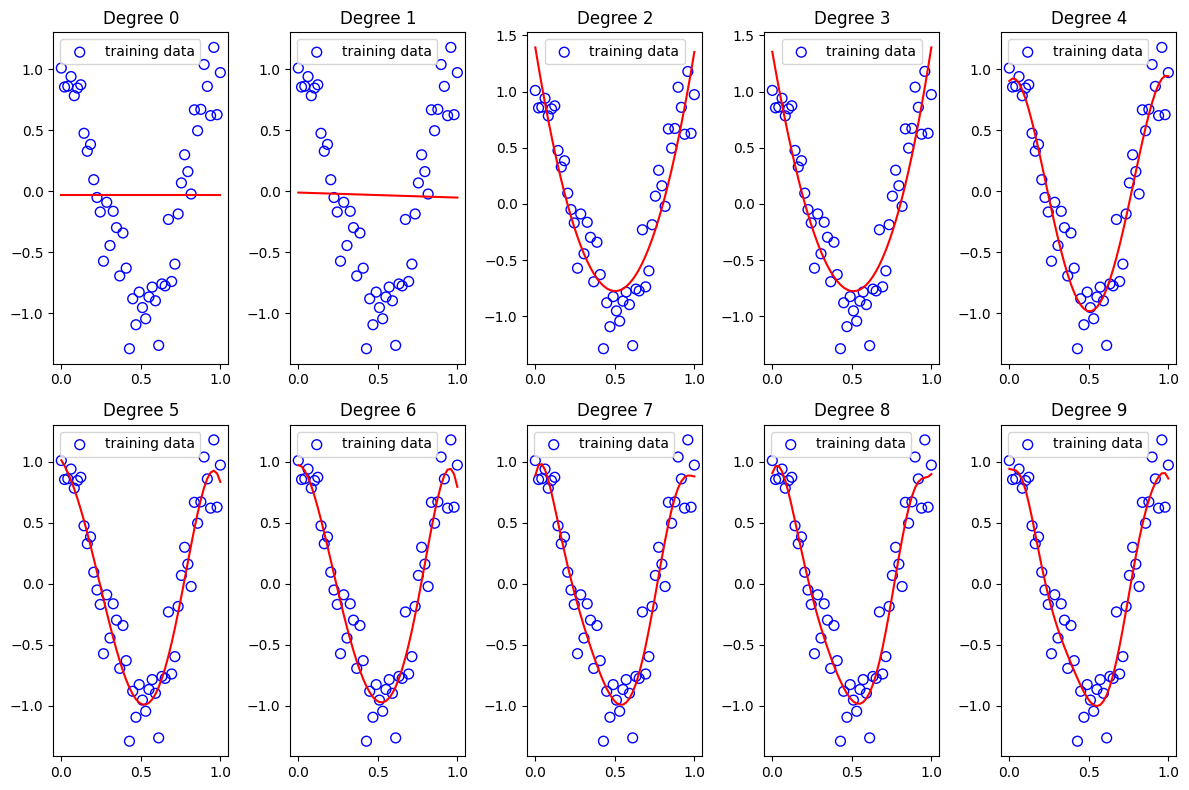

In [20]:
m_values = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12, 8))

for m in m_values:
    # Create polynomial features
    poly_features = PolynomialFeature(degree=m)
    X_poly = poly_features.transform(x_train2.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train2)

    y_pred = model.predict(X_poly)

    plt.subplot(2, 5, m + 1)
    plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_train2, y_pred, color='r')
    plt.title(f'Degree {m}')
    plt.legend()

plt.tight_layout()
plt.show()

## 1b) Which degree of polynomial fits the best and why?


m = 4
y = w0 + w1x + w2x^2 + w3x^3 + w4x^4 

Best choice for m is 4 as it fits training sets perfectly and minimises the error. m = 9 won't be a best choice 
as it is computationally expensive and it will result in overfitting as most of the training points are on the error function.

### 2a) Plot a graph showing the training RMSE and test RMSE for various values of M (Degree) 
Poynomial function = 4 * x**3 - 3 * x**2 + 2 * x - 1

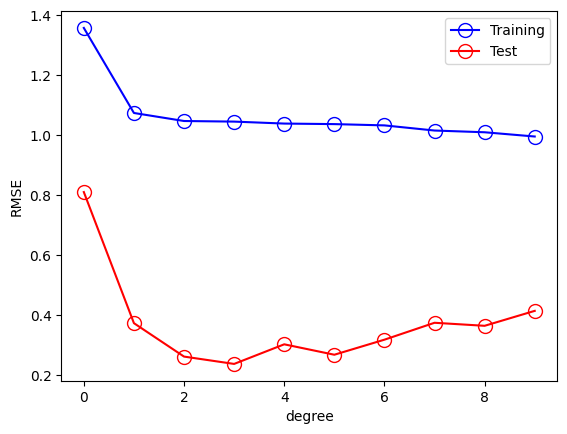

In [21]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

from sklearn.metrics import mean_squared_error 
#your code goes here
degrees = list(range(10))

training_errors = []
test_errors = []

for m in degrees:
    feature = PolynomialFeature(degree=m)
    X_train = feature.transform(x_train1.reshape(-1, 1))
    X_test = feature.transform(x_test1.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train, y_train1)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train1))
    test_errors.append(rmse(model.predict(X_test), y_test1 + np.random.normal(scale=0.25, size=len(y_test1))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### 2b) Explain your observations and which value of M do you think is the best choice for the given data?

In the case of M = 4 and M = 8. RMSE is almost equal.So, we choose M = 4 
as there's no point of evaluating four more parameters.


### 2a) Plot a graph showing the training RMSE and test RMSE for various values of M (Degree) 
Cos function = cos(2*pi*x)

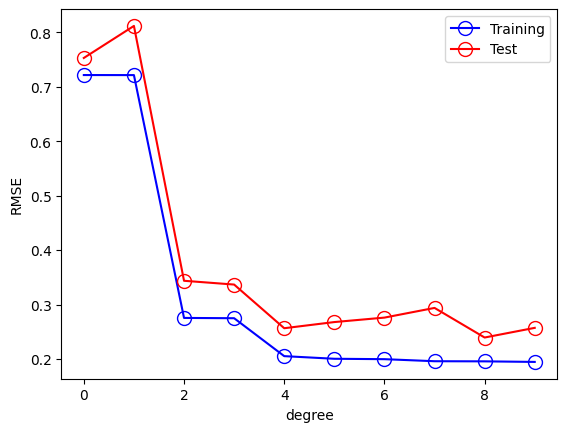

In [22]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

from sklearn.metrics import mean_squared_error 
#your code goes here
degrees = list(range(10))

training_errors = []
test_errors = []

for m in degrees:
    feature = PolynomialFeature(degree=m)
    X_train = feature.transform(x_train2.reshape(-1, 1))
    X_test = feature.transform(x_test2.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train, y_train2)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train2))
    test_errors.append(rmse(model.predict(X_test), y_test2 + np.random.normal(scale=0.25, size=len(y_test2))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### 2b) Explain your observations and which value of M do you think is the best choice for the given data?

In the case of M = 4 and M = 8. RMSE is almost equal.So, we choose M = 4 as there's no point of evaluating four more parameters.
M = 9 means 10 degress of freedom.Tuned exactly to 10 training points - wild oscillations in polynomial.

3.Regularization 



3.#Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression
Poynomial function = 4 * x**3 - 3 * x**2 + 2 * x - 1

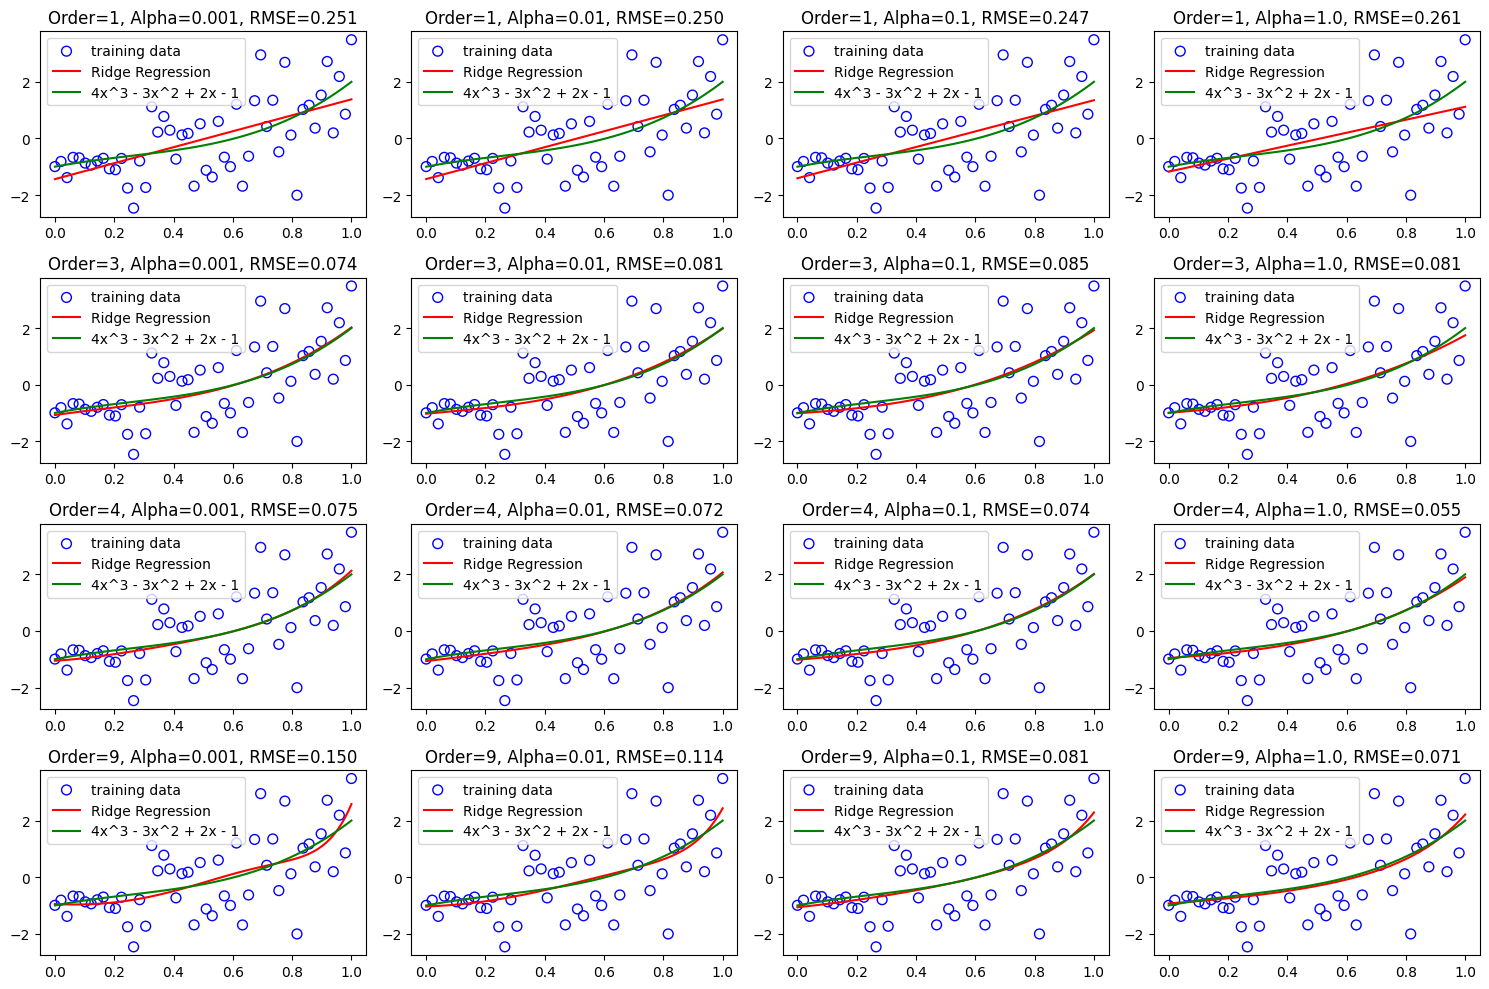

In [26]:
from sklearn.linear_model import Ridge
poly_orders = [1,3,4,9]
alpha_values = [0.001, 0.01, 0.1, 1.0] 

# Create subplots for each combination of polynomial order and alpha
fig, axs = plt.subplots(len(poly_orders), len(alpha_values), figsize=(15, 10))

def func(x):
    return 4 * x**3 - 3 * x**2 + 2 * x - 1

for i, order in enumerate(poly_orders):
    for j, alpha in enumerate(alpha_values):
        poly = PolynomialFeature(degree=order)
        x_train_poly = poly.transform(x_train1.reshape(-1, 1))
        x_test_poly = poly.transform(x_test1.reshape(-1, 1))

        ridge = Ridge(alpha=alpha)
        ridge.fit(x_train_poly, y_train1)

        y_test_pred = ridge.predict(x_test_poly)

        rmse = np.sqrt(mean_squared_error(y_test1, y_test_pred))

        axs[i, j].scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
        axs[i, j].plot(x_test1, y_test_pred, c="r", label="Ridge Regression")
        axs[i, j].plot(x_test1, func(x_test1), c="g", label="4x^3 - 3x^2 + 2x - 1")
        axs[i, j].set_title(f"Order={order}, Alpha={alpha}, RMSE={rmse:.3f}")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

3.#Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression
Cos function = cos(2*pi*x)

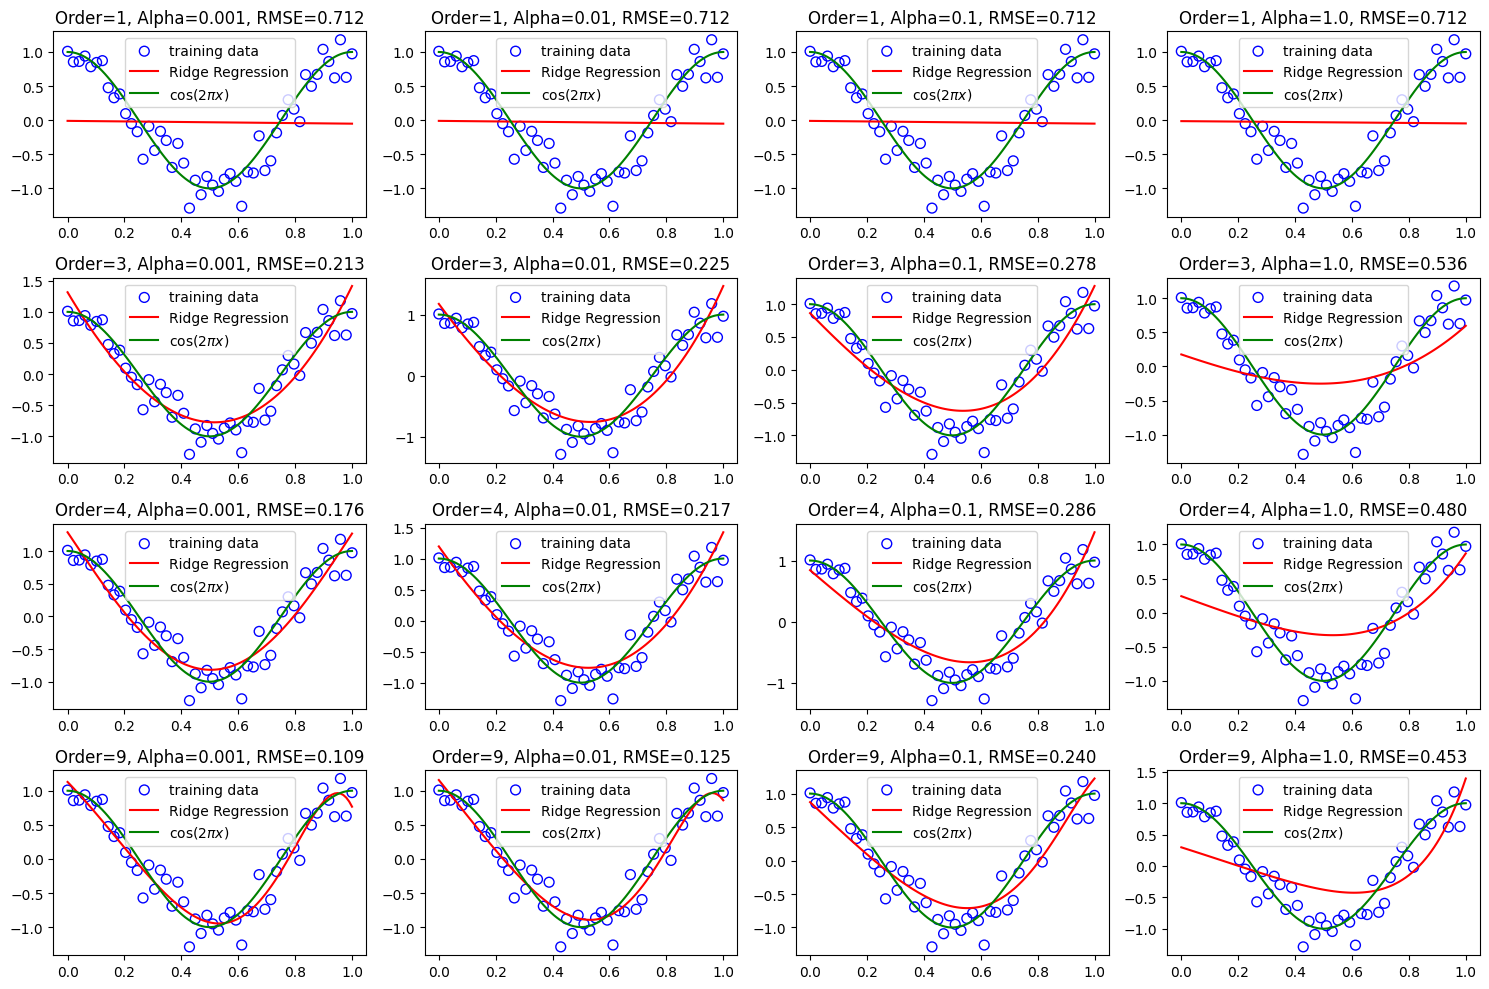

In [24]:
from sklearn.linear_model import Ridge
poly_orders = [1,3,4,9]
alpha_values = [0.001, 0.01, 0.1, 1.0] 

# Create subplots for each combination of polynomial order and alpha
fig, axs = plt.subplots(len(poly_orders), len(alpha_values), figsize=(15, 10))

def func(x):
    return np.cos(2 * np.pi * x)

for i, order in enumerate(poly_orders):
    for j, alpha in enumerate(alpha_values):
        poly = PolynomialFeature(degree=order)
        x_train_poly = poly.transform(x_train2.reshape(-1, 1))
        x_test_poly = poly.transform(x_test2.reshape(-1, 1))

        ridge = Ridge(alpha=alpha)
        ridge.fit(x_train_poly, y_train2)

        y_test_pred = ridge.predict(x_test_poly)

        rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred))

        axs[i, j].scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
        axs[i, j].plot(x_test2, y_test_pred, c="r", label="Ridge Regression")
        axs[i, j].plot(x_test2, func(x_test2), c="g", label="$\cos(2\pi x) $")
        axs[i, j].set_title(f"Order={order}, Alpha={alpha}, RMSE={rmse:.3f}")
        axs[i, j].legend()

plt.tight_layout()
plt.show()